In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotify_songs.csv')

In [3]:
# Veri setindeki sütun adlarını yeniden adlandırma işlemi yapıldı.
data.rename(columns={'track_popularity': 'popularity', 
                     'track_artist': 'artist', 
                     'track_name': 'name', 
                     'track_album_id': 'album_id', 
                     'track_album_name': 'album_name', 
                     'track_album_release_date': 'album_release_date', 
                     'playlist_genre': 'genre', 
                     'playlist_subgenre': 'subgenre'}, inplace=True)

In [4]:
print("Info: ", data.info()) # Veri setinin genel bilgilerini görüntüleme
print("Unique Playlist Name Number: ", len(data['playlist_name'].unique())) # Eşsiz çalma listesi isimlerinin sayısını görüntüleme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            32833 non-null  object 
 1   name                32828 non-null  object 
 2   artist              32828 non-null  object 
 3   popularity          32833 non-null  int64  
 4   album_id            32833 non-null  object 
 5   album_name          32828 non-null  object 
 6   album_release_date  32833 non-null  object 
 7   playlist_name       32833 non-null  object 
 8   playlist_id         32833 non-null  object 
 9   genre               32833 non-null  object 
 10  subgenre            32833 non-null  object 
 11  danceability        32833 non-null  float64
 12  energy              32833 non-null  float64
 13  key                 32833 non-null  int64  
 14  loudness            32833 non-null  float64
 15  mode                32833 non-null  int64  
 16  spee

In [5]:
print("Description: ", data.describe().T) # Veri setinin istatistiksel özetini görüntüleme

Description:                      count           mean           std          min  \
popularity        32833.0      42.477081     24.984074     0.000000   
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
key               32833.0       5.374471      3.611657     0.000000   
loudness          32833.0      -6.719499      2.988436   -46.448000   
mode              32833.0       0.565711      0.495671     0.000000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  59834.006182  4000.00

In [6]:
# Null içeren satırlar listelendi. Toplamda 5 satır null değer içeriyor.
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [7]:
data[data['track_id'].duplicated()]

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1299,1HfMVBKM75vxSfsQ5VefZ5,Lose You To Love Me,Selena Gomez,93,3tBkjgxDqAwss76O1YHsSY,Lose You To Love Me,2019-10-23,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,4,-9.005,1,0.0438,0.576000,0.00000,0.2100,0.0916,101.993,206459
1300,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,11,-7.209,1,0.0546,0.837000,0.00000,0.0822,0.5750,91.019,189486
1304,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,1,-5.679,1,0.0319,0.751000,0.00000,0.1050,0.4460,109.891,182161
1305,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,9,-6.049,0,0.0290,0.039200,0.00000,0.0828,0.7490,116.967,190800
1307,6cy3ki60hLwimwIje7tALf,RITMO (Bad Boys For Life),The Black Eyed Peas,96,6EobpC5SDFy5DF50dWNVGF,RITMO (Bad Boys For Life),2019-10-12,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,10,-7.037,0,0.0657,0.033400,0.00084,0.2370,0.6670,104.994,221714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,1mzGywacjpeik00PVLBPpF,All of Me (Tiësto's Birthday Treatment Remix) ...,John Legend,64,4c2rSdHI9WUXn0zyXoWtbB,All of Me (Tiësto's Birthday Treatment Remix) ...,2014-02-25,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.253,0,0.0283,0.000151,0.00165,0.0745,0.1790,127.986,251613
32793,1nas007nDbzLwDGwvMdz79,How You Love Me,3LAU,52,0IsgaoqRfJAJ6wojxWDZ7C,How You Love Me,2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-3.648,1,0.0839,0.183000,0.00000,0.3400,0.2860,127.961,210469
32798,65hRZOQkVjmBdusz1N7aOv,Save The World,Swedish House Mafia,67,728voOLBbJUBgK2vooghcS,Save The World,2011-05-13,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-7.598,1,0.0474,0.014400,0.00000,0.0759,0.4000,126.879,213338
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,2013-10-22,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.893,0,0.0413,0.031900,0.00536,0.1280,0.1890,145.022,257045


In [8]:
data[data['track_id'] == '6v3KW9xbzN5yKLt9YKDYA2']

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1167,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,TUNES DANCE AND POP,3arpkhoRWXEYbdCpVAIrRR,pop,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
1305,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
18651,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Latin Pop 2019,5wONX0lVyQE5XTxqjTUiUd,latin,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
20329,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Latest Latin American Hits 2020,51LvliKED7oZNJR8XCiPip,latin,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
23114,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
30216,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800


In [9]:
# Şarkı ismi ve album ismi aynı olan şarkıların popülaritesinin ortalaması hesaplandı: 41.80891787852865
same_within_album_name = data[data['name'] == data['album_name']]
avg = same_within_album_name['popularity'].mean()
print(f'Average popularity of songs with the same name as their album: {avg}')

Average popularity of songs with the same name as their album: 45.53182788051209


In [10]:
# "key" sütununun benzersiz değerleri listelendi.
data['key'].unique()

array([ 6, 11,  1,  7,  8,  5,  4,  2,  0, 10,  9,  3])

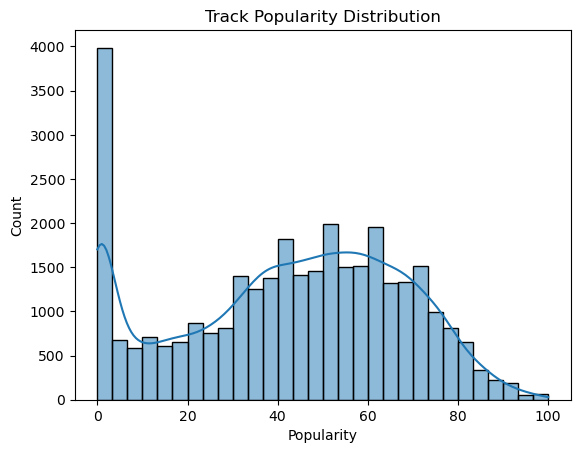

In [11]:
# Popülarite dağılımı histogramla görselleştirildi.
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

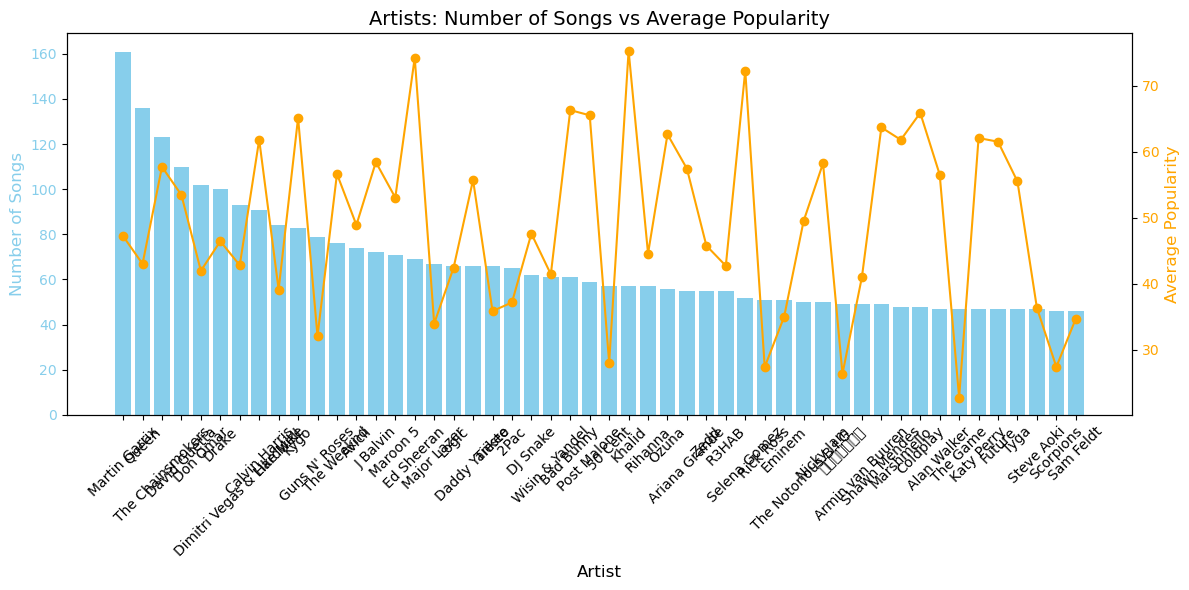

In [12]:
# Her artist'in şarkı sayısını ve ortalama popülerliğini hesaplamak için gerekli işlemler yapıldı.

artist_counts = data['artist'].value_counts() # Her bir artist için şarkı sayısı hesaplandı.
artist_popularity = data.groupby('artist')['popularity'].mean().loc[artist_counts.index] # Her bir artist için ortalama popülerlik hesaplandı.

# Veri birleştirildi.
artist_stats = pd.DataFrame({
    'Song Count': artist_counts,
    'Average Popularity': artist_popularity
})

# En popüler ilk 50 sanatçı gösterildi.
top_artists = artist_stats.head(50)

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(12, 6))

# Şarkı sayısı için bar grafiği kullanıldı.
ax1.bar(top_artists.index, top_artists['Song Count'], color='skyblue', label='Song Count')
ax1.set_xlabel('Artist', fontsize=12)
ax1.set_ylabel('Number of Songs', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)

# Ortalama popülerlik için çizgi grafiği kullanıldı.
ax2 = ax1.twinx()
ax2.plot(top_artists.index, top_artists['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend eklendi.
plt.title('Artists: Number of Songs vs Average Popularity', fontsize=14)
fig.tight_layout()

plt.show()

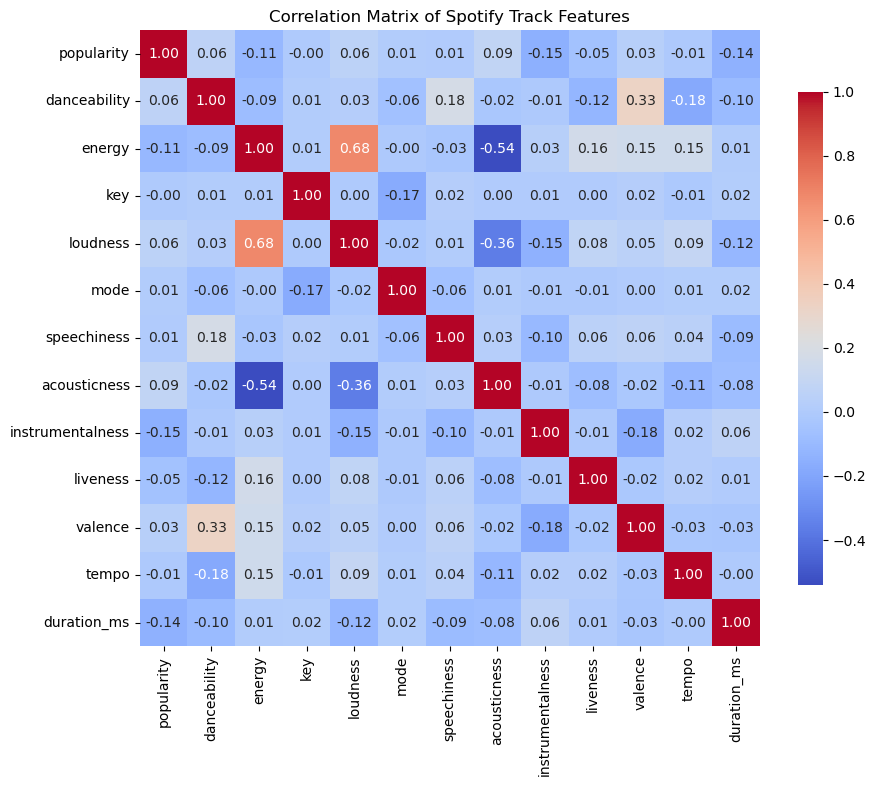

In [13]:
# Korelasyon matrisi hesaplandı ve ısı haritası ile görselleştirildi.
numeric_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']
corr_table_data = data[numeric_cols]
corr_table = corr_table_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Track Features')
plt.show()

# Burada loudness ve energy arasında güçlü bir pozitif korelasyon olduğu gözlendi.
# Bu, daha yüksek enerjiye sahip şarkıların genellikle daha yüksek ses seviyelerine sahip olduğunu gösterir.

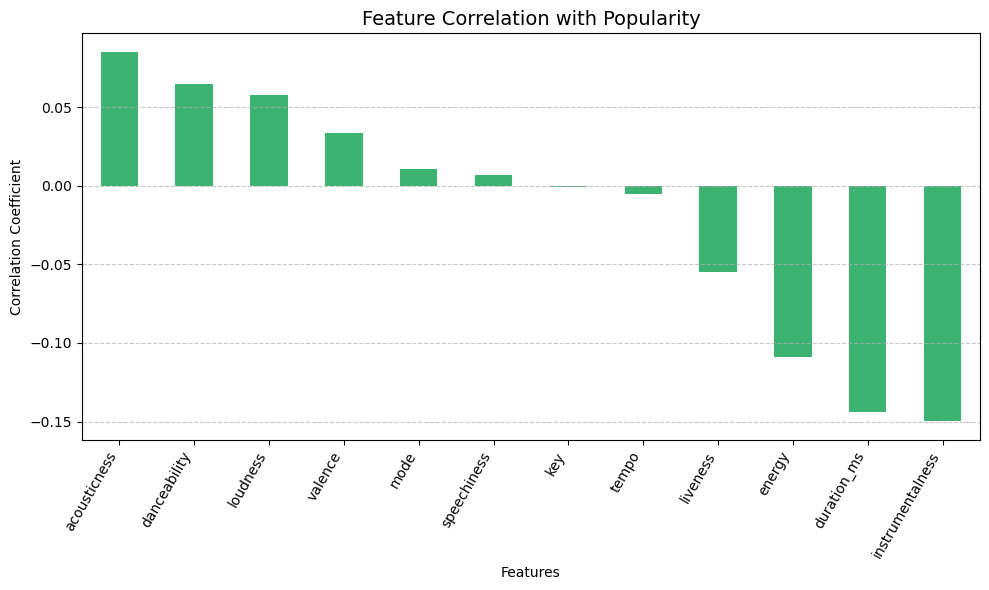

In [14]:
# Popülarite ile diğer özellikler arasındaki korelasyonlar sıralandı ve görselleştirildi.
sorted_corr = corr_table['popularity'].sort_values(ascending=False)
sorted_corr =sorted_corr.drop('popularity', errors='ignore')

# Korelasyonları görselleştirme
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='mediumseagreen')

plt.title('Feature Correlation with Popularity', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

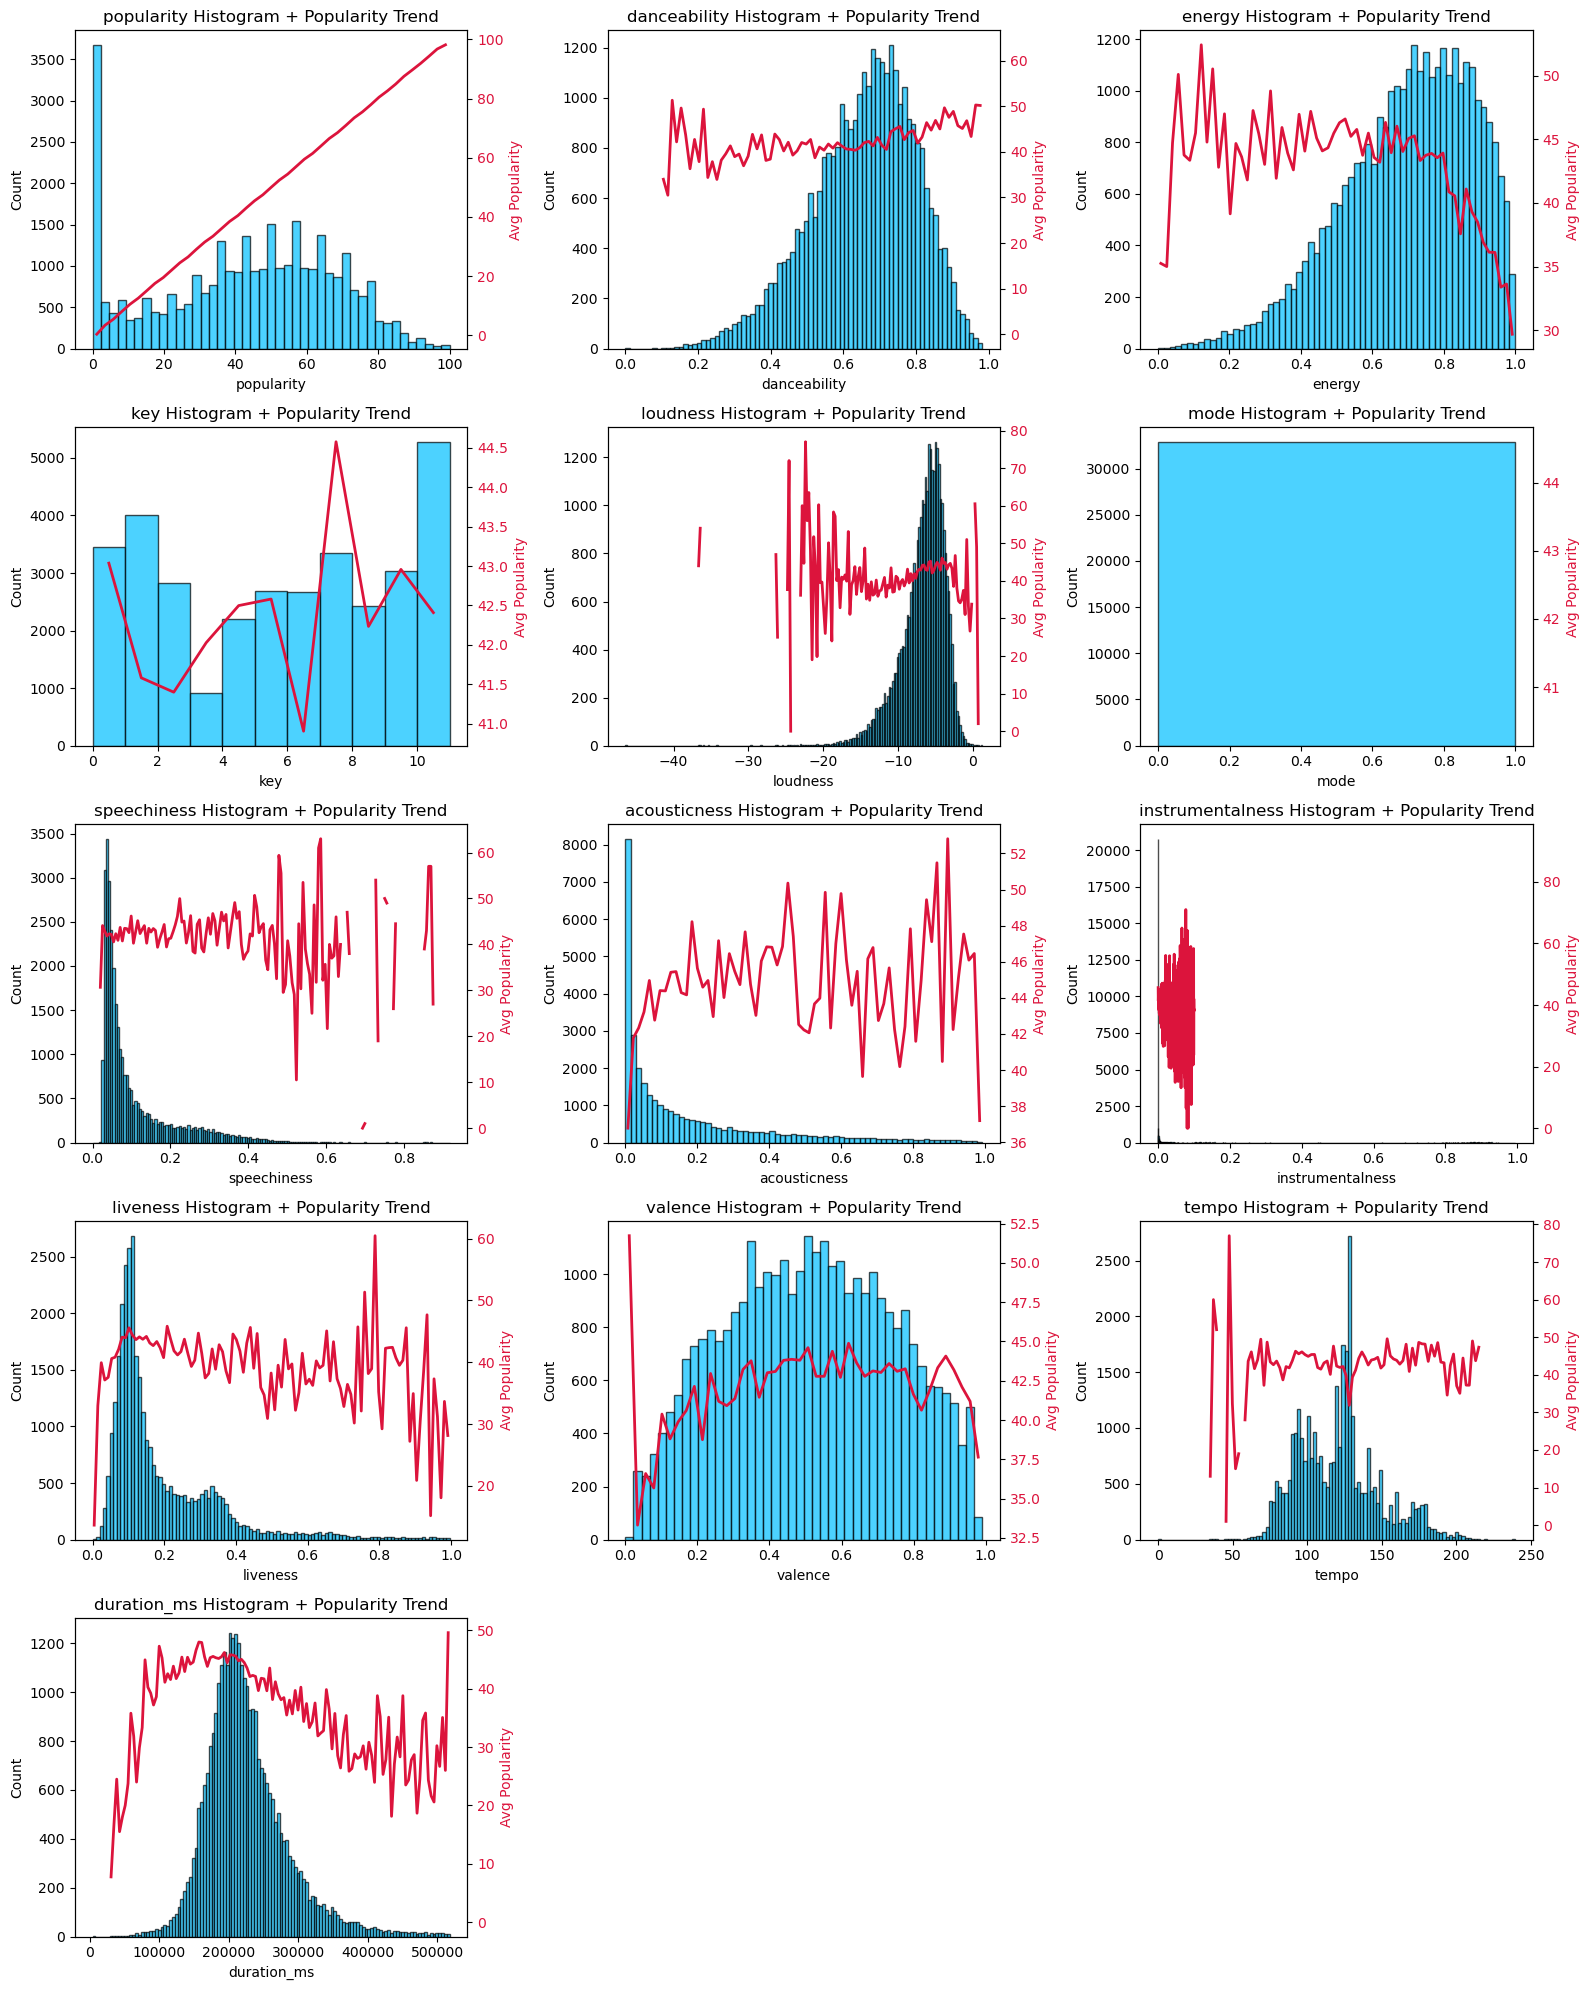

In [15]:
# Numerik sütunlar için dağılımlar ve belli aralıklar içindeki popülarite trendleri görselleştirildi.

# Satır–sütun sayısını otomatik belirle
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histogram (önce otomatik bin aralıklarını al)
    counts, bins, patches = axes[i].hist(data[col], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)
    
    # Popularity ortalamaları (bin aralıklarına göre): trend görüntüleme
    bin_labels = pd.cut(data[col], bins=bins, include_lowest=True)
    grouped = data.groupby(bin_labels)['popularity'].mean()
    centers = [interval.mid for interval in grouped.index]
    bin_means = grouped.values

    # Popularity çizgisi
    ax2 = axes[i].twinx()
    ax2.plot(centers, bin_means, color='crimson', linewidth=2)
    ax2.set_ylabel('Avg Popularity', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')

    axes[i].set_title(f'{col} Histogram + Popularity Trend')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Boş kalan hücreleri gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Her bir feature için dağılımlar, min-max değerler incelendi.
# Tempo, loudness ve duration_ms özelliklerinin normalize edilmesi gerektiği gözlemlendi.

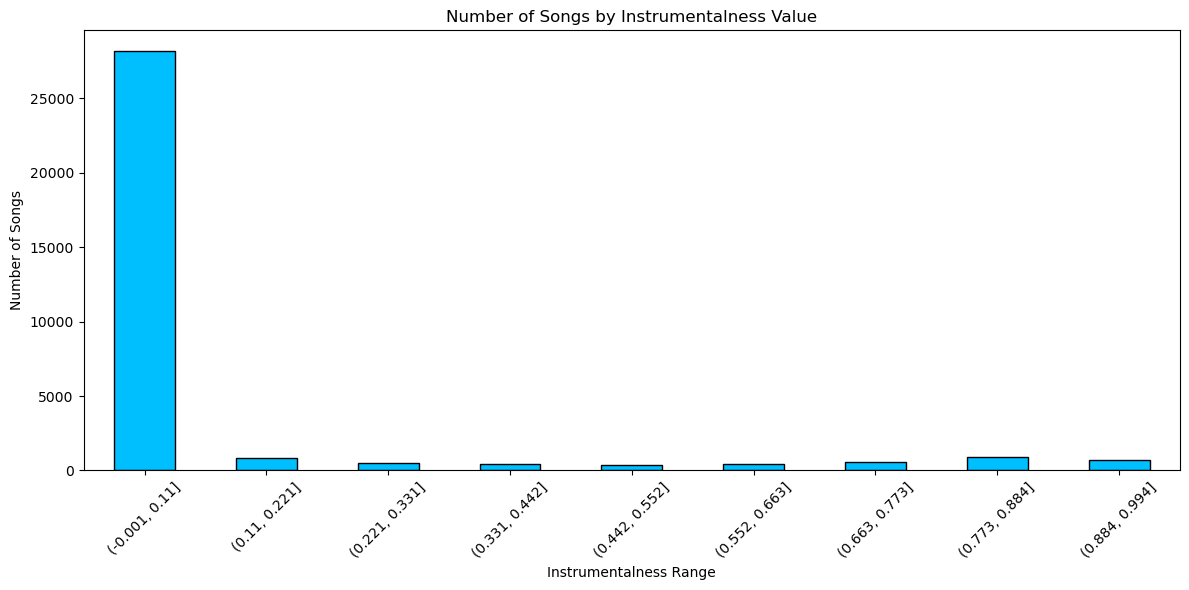

In [16]:
# Instrumentalness değerleri eşit aralıklara bölündü ve her aralıktaki şarkı sayısı görselleştirildi.

bins = np.linspace(data['instrumentalness'].min(), data['instrumentalness'].max(), 10) # Eşit aralıklı 10 bin oluşturuldu.
bin_labels = pd.cut(data['instrumentalness'], bins=bins, include_lowest=True)
counts = data.groupby(bin_labels).size()

plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xlabel('Instrumentalness Range')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Instrumentalness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count:  25836


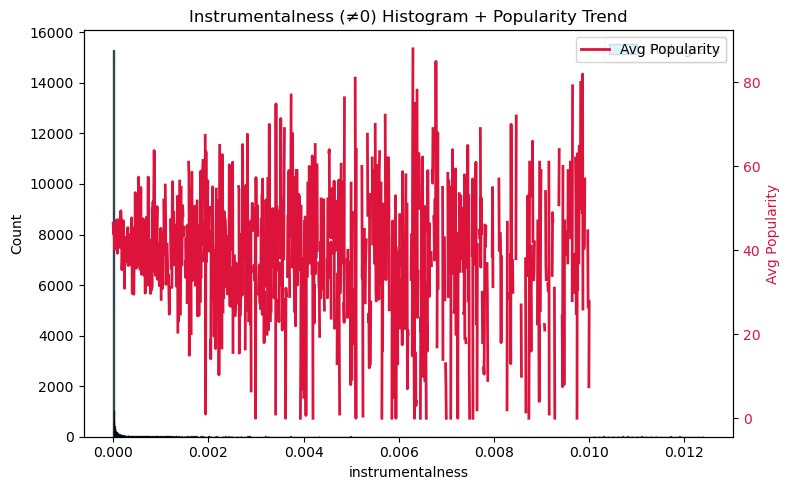

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

# Sadece 0 olmayanları al
filtered = data[data['instrumentalness']  < 0.0125]
print("count: ", len(filtered))

# Histogram (otomatik bin aralıkları)
counts, bins, patches = ax.hist(filtered['instrumentalness'], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)

# Popularity ortalaması (bin aralıklarına göre)
bin_labels = pd.cut(filtered['instrumentalness'], bins=bins, include_lowest=True)
grouped = filtered.groupby(bin_labels)['popularity'].mean()
centers = [interval.mid for interval in grouped.index]
bin_means = grouped.values

# Popularity çizgisi
ax2 = ax.twinx()
ax2.plot(centers, bin_means, color='crimson', linewidth=2, label='Avg Popularity')
ax2.set_ylabel('Avg Popularity', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

ax.set_title('Instrumentalness (≠0) Histogram + Popularity Trend')
ax.set_xlabel('instrumentalness')
ax.set_ylabel('Count')
ax.legend(['Histogram'])
ax2.legend(['Avg Popularity'])

plt.tight_layout()
plt.show()

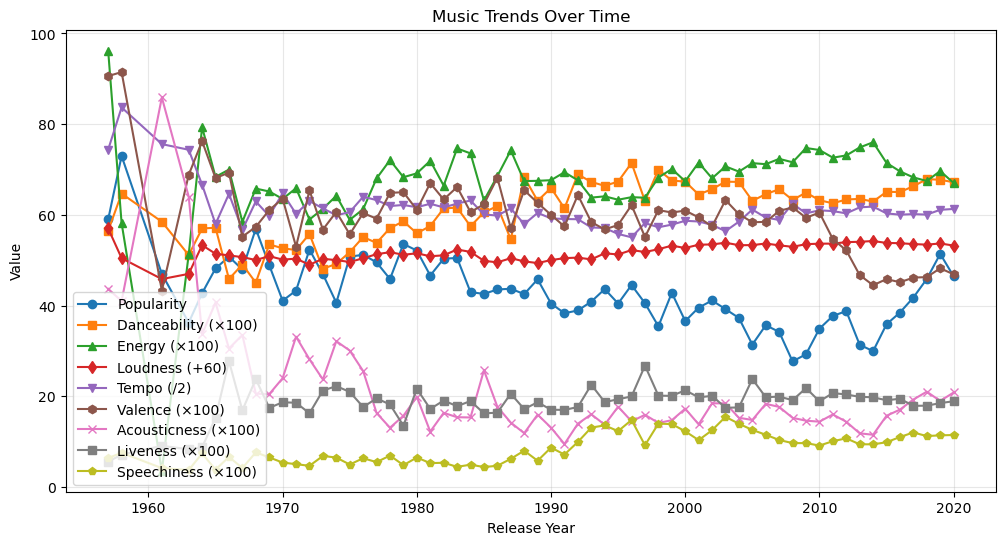

In [18]:
# Yıl bilgisine göre şarkıların özellik değişimleri analiz edildi.

# Albüm çıkış tarihinden yıl bilgisi çıkarılıp "release_year" sütunu oluşturuldu.
data['release_year'] = pd.to_datetime(data['album_release_date'], errors='coerce').dt.year

# Her yıl için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
yearly_stats = data.groupby('release_year').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['release_year'], yearly_stats['popularity'], marker='o', label='Popularity')
plt.plot(yearly_stats['release_year'], yearly_stats['danceability']*100, marker='s', label='Danceability (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['energy']*100, marker='^', label='Energy (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['loudness']+60, marker='d', label='Loudness (+60)')
plt.plot(yearly_stats['release_year'], yearly_stats['tempo']/2, marker='v', label='Tempo (/2)')
plt.plot(yearly_stats['release_year'], yearly_stats['valence']*100, marker='h', label='Valence (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['acousticness']*100, marker='x', label='Acousticness (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['liveness']*100, marker='s', label='Liveness (×100)')   
plt.plot(yearly_stats['release_year'], yearly_stats['speechiness']*100, marker='p', label='Speechiness (×100)')
plt.xlabel('Release Year')
plt.ylabel('Value')
plt.title('Music Trends Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

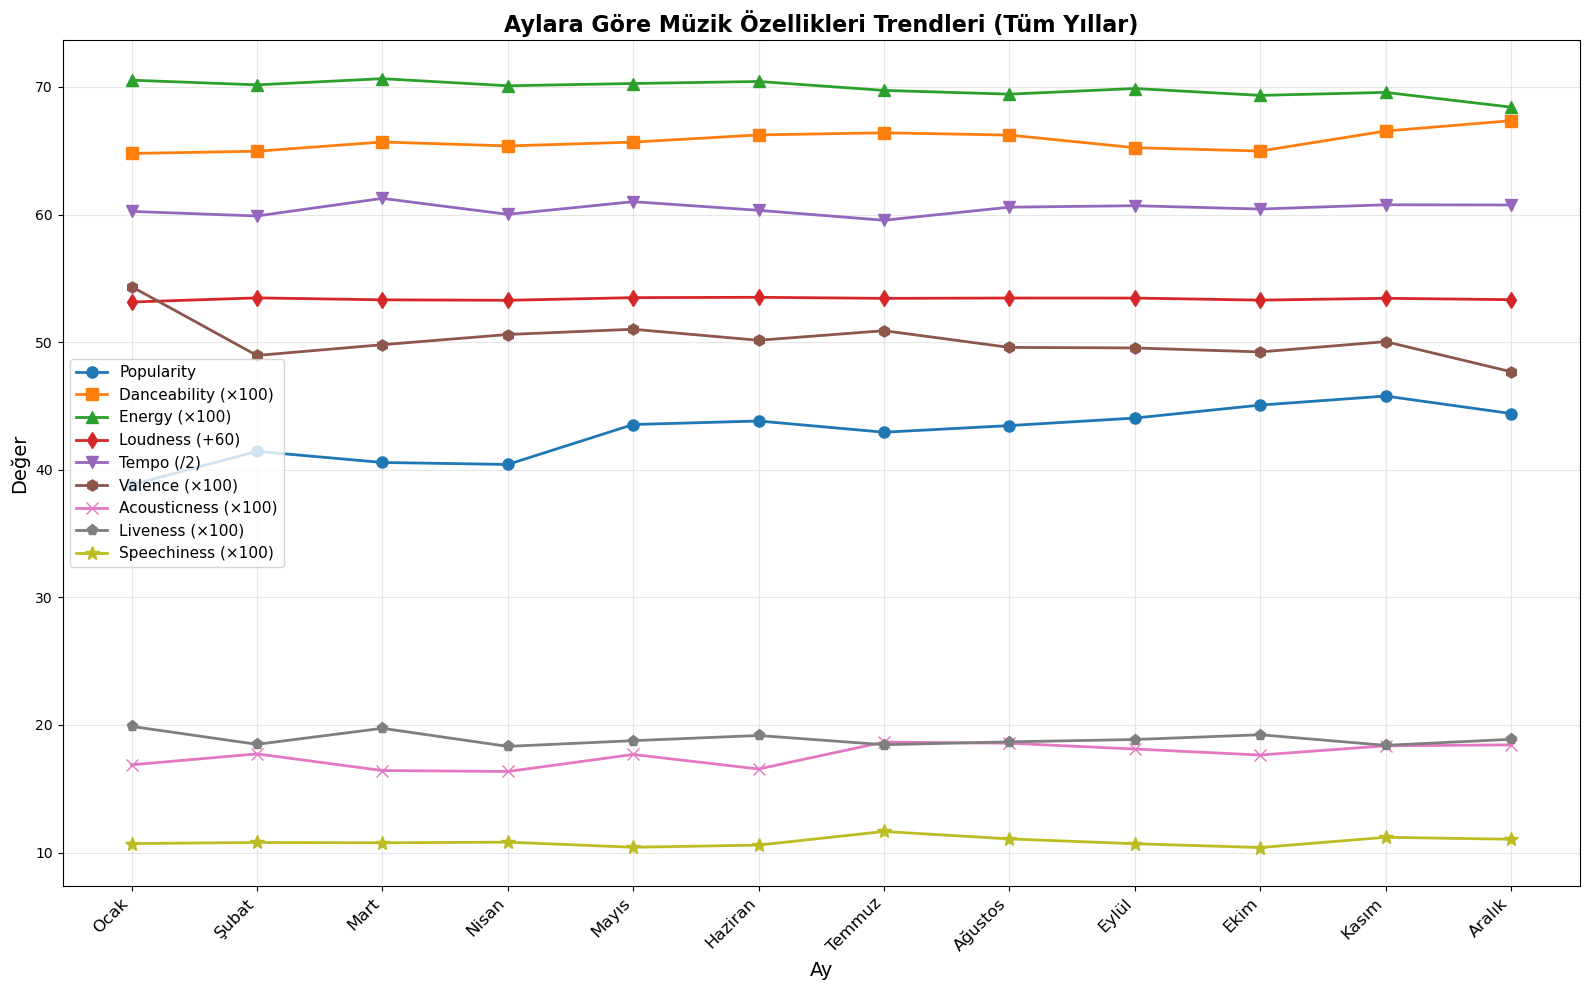


Aylara Göre Müzik Özellikleri:
month_name  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
      Ocak   38.815593      0.647841 0.705292 -6.857929 120.490980      0.168746  0.198874 0.543524     0.107043
     Şubat   41.439554      0.649614 0.701627 -6.532297 119.771330      0.177305  0.184800 0.489556     0.107877
      Mart   40.568374      0.656838 0.706457 -6.684679 122.527813      0.164267  0.197365 0.497974     0.107635
     Nisan   40.412105      0.653753 0.700900 -6.721506 120.028215      0.163504  0.183177 0.505974     0.108135
     Mayıs   43.542702      0.656733 0.702678 -6.513657 122.014473      0.176841  0.187671 0.510087     0.104115
   Haziran   43.818410      0.662380 0.704272 -6.486940 120.660507      0.165469  0.191726 0.501440     0.105826
    Temmuz   42.938776      0.664045 0.697270 -6.569734 119.101667      0.186565  0.184493 0.508967     0.116506
   Ağustos   43.459530      0.662258 0.694333 -6.544075 121.1510

In [19]:
# Ay bilgisine göre şarkıların özellik değişimleri analiz edildi.

# Albüm çıkış tarihinden ay bilgisi çıkarılıp "release_month" sütunu oluşturuldu.
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Ay isimleri sözlüğü tanımlandı.
month_names = {
    1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 
    5: 'Mayıs', 6: 'Haziran', 7: 'Temmuz', 8: 'Ağustos',
    9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'
}

# Her ay için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
monthly_stats = data.groupby('release_month').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Ay isimlerini ekleme
monthly_stats['month_name'] = monthly_stats['release_month'].map(month_names)

# Görselleştirme
plt.figure(figsize=(16, 10))

plt.plot(monthly_stats['month_name'], monthly_stats['popularity'], marker='o', linewidth=2, markersize=8, label='Popularity')
plt.plot(monthly_stats['month_name'], monthly_stats['danceability']*100, marker='s', linewidth=2, markersize=8, label='Danceability (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['energy']*100, marker='^', linewidth=2, markersize=8, label='Energy (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['loudness']+60, marker='d', linewidth=2, markersize=8, label='Loudness (+60)')
plt.plot(monthly_stats['month_name'], monthly_stats['tempo']/2, marker='v', linewidth=2, markersize=8, label='Tempo (/2)')
plt.plot(monthly_stats['month_name'], monthly_stats['valence']*100, marker='h', linewidth=2, markersize=8, label='Valence (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['acousticness']*100, marker='x', linewidth=2, markersize=8, label='Acousticness (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['liveness']*100, marker='p', linewidth=2, markersize=8, label='Liveness (×100)')   
plt.plot(monthly_stats['month_name'], monthly_stats['speechiness']*100, marker='*', linewidth=2, markersize=10, label='Speechiness (×100)')

plt.xlabel('Ay', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Aylara Göre Müzik Özellikleri Trendleri (Tüm Yıllar)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Aylık istatistikleri tablo olarak göster
print("\nAylara Göre Müzik Özellikleri:")
print(monthly_stats[['month_name', 'popularity', 'danceability', 'energy', 'loudness', 
                     'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))

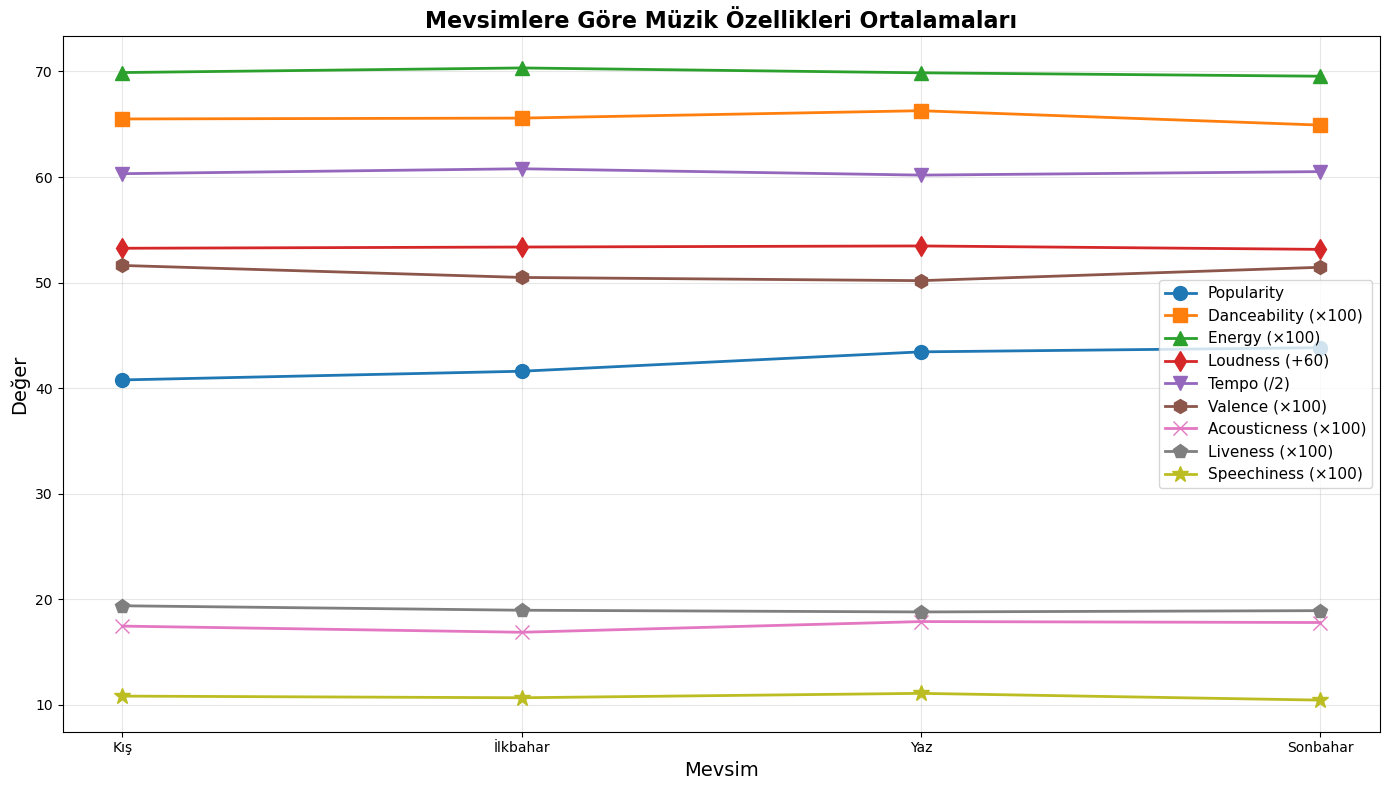


Mevsimlere Göre Müzik Özellikleri:
  season  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
     Kış   40.770685      0.655015 0.699001 -6.751146 120.632324      0.174425  0.193685 0.516190     0.108089
İlkbahar   41.594709      0.655843 0.703367 -6.634304 121.566798      0.168574  0.189460 0.504833     0.106518
     Yaz   43.431387      0.662838 0.698761 -6.531382 120.361199      0.178720  0.187844 0.501784     0.110694
Sonbahar   43.823345      0.649226 0.695533 -6.856848 121.024675      0.177823  0.189062 0.514460     0.104283


In [20]:
# Mevsim bilgisine göre şarkıların özellik değişimi analiz edildi.

# Tarih bilgisinden ay bilgisi çıkarıldı.
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Mevsim tanımlama fonksiyonu
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:  # 9, 10, 11
        return 'Sonbahar'

# Her şarkıya mevsim bilgisi eklendi.
data['season'] = data['release_month'].apply(get_season)

# Her mevsim için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
seasonal_stats = data.groupby('season').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Mevsimleri doğru sırayla düzenle
season_order = ['Kış', 'İlkbahar', 'Yaz', 'Sonbahar']
seasonal_stats['season'] = pd.Categorical(seasonal_stats['season'], categories=season_order, ordered=True)
seasonal_stats = seasonal_stats.sort_values('season')

# Görselleştirme
plt.figure(figsize=(14, 8))

plt.plot(seasonal_stats['season'], seasonal_stats['popularity'], marker='o', linewidth=2, markersize=10, label='Popularity')
plt.plot(seasonal_stats['season'], seasonal_stats['danceability']*100, marker='s', linewidth=2, markersize=10, label='Danceability (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['energy']*100, marker='^', linewidth=2, markersize=10, label='Energy (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['loudness']+60, marker='d', linewidth=2, markersize=10, label='Loudness (+60)')
plt.plot(seasonal_stats['season'], seasonal_stats['tempo']/2, marker='v', linewidth=2, markersize=10, label='Tempo (/2)')
plt.plot(seasonal_stats['season'], seasonal_stats['valence']*100, marker='h', linewidth=2, markersize=10, label='Valence (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['acousticness']*100, marker='x', linewidth=2, markersize=10, label='Acousticness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['liveness']*100, marker='p', linewidth=2, markersize=10, label='Liveness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['speechiness']*100, marker='*', linewidth=2, markersize=12, label='Speechiness (×100)')

plt.xlabel('Mevsim', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Mevsimlere Göre Müzik Özellikleri Ortalamaları', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Mevsimsel istatistikleri tablo olarak göster
print("\nMevsimlere Göre Müzik Özellikleri:")
print(seasonal_stats[['season', 'popularity', 'danceability', 'energy', 'loudness', 
                      'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))


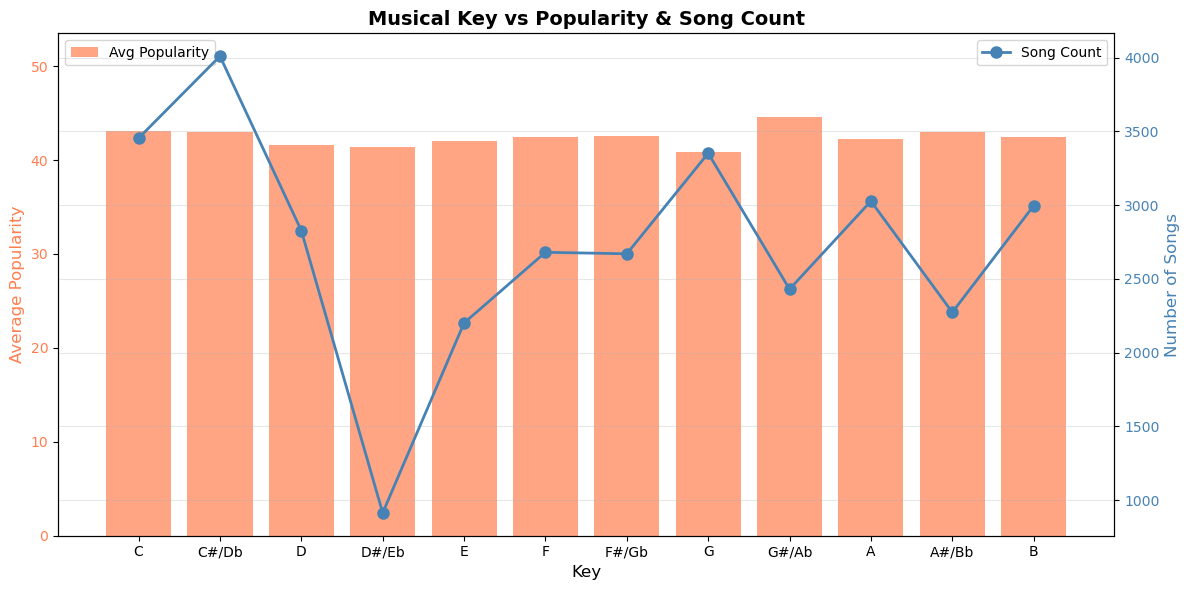


Key-Popularity İstatistikleri:
Key Name  Avg Popularity  Song Count
       C       43.087145        3454
   C#/Db       42.994015        4010
       D       41.581535        2827
   D#/Eb       41.399781         913
       E       42.028169        2201
       F       42.498507        2680
   F#/Gb       42.581648        2670
       G       40.904535        3352
   G#/Ab       44.577366        2430
       A       42.234225        3027
   A#/Bb       42.957765        2273
       B       42.409212        2996


In [21]:
# Key değeri ile popularity arasındaki ilişki analiz edildi.

# Her key için ortalama popularity hesapla
key_popularity = data.groupby('key')['popularity'].agg(['mean', 'count']).reset_index()
key_popularity.columns = ['Key', 'Avg Popularity', 'Song Count']

# Müzik teorisi için key isimleri
key_names = {
    0: 'C', 1: 'C#/Db', 2: 'D', 3: 'D#/Eb', 4: 'E', 5: 'F',
    6: 'F#/Gb', 7: 'G', 8: 'G#/Ab', 9: 'A', 10: 'A#/Bb', 11: 'B'
}
key_popularity['Key Name'] = key_popularity['Key'].map(key_names)

# Görselleştirme
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ortalama popularity (bar grafiği)
bars = ax1.bar(key_popularity['Key Name'], key_popularity['Avg Popularity'], 
               color='coral', alpha=0.7, label='Avg Popularity')
ax1.set_xlabel('Key', fontsize=12)
ax1.set_ylabel('Average Popularity', color='coral', fontsize=12)
ax1.tick_params(axis='y', labelcolor='coral')
ax1.set_ylim([0, max(key_popularity['Avg Popularity']) * 1.2])

# Şarkı sayısı (çizgi grafiği)
ax2 = ax1.twinx()
ax2.plot(key_popularity['Key Name'], key_popularity['Song Count'], 
         color='steelblue', marker='o', linewidth=2, markersize=8, label='Song Count')
ax2.set_ylabel('Number of Songs', color='steelblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='steelblue')

# Başlık ve legend
plt.title('Musical Key vs Popularity & Song Count', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# İstatistikleri göster
print("\nKey-Popularity İstatistikleri:")
print(key_popularity[['Key Name', 'Avg Popularity', 'Song Count']].to_string(index=False))